# **Global Air Pollution Analysis**

*September 23, 2023*

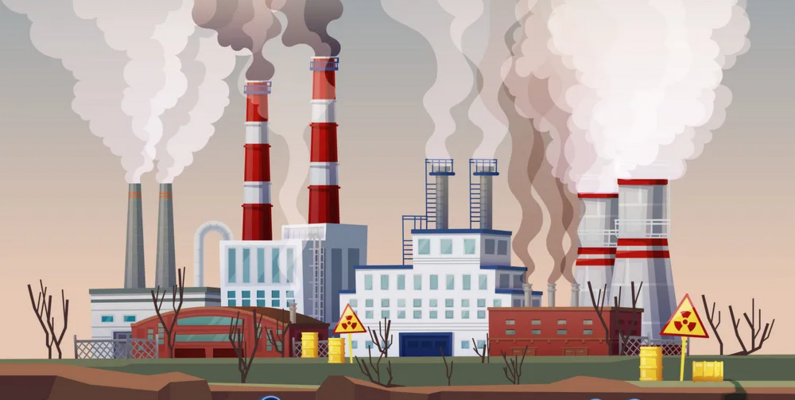

The **Global Air Pollution Dataset** used for this analysis is sourced from Kaggle, a popular platform for datasets and data science projects. The data has the following variables:
* Country : Name of the country
* City : Name of the city
* AQI Value : Overall AQI value of the city
* AQI Category : Overall AQI category of the city
* CO AQI Value : AQI value of Carbon Monoxide of the city
* CO AQI Category : AQI category of Carbon Monoxide of the city
* Ozone AQI Value : AQI value of Ozone of the city
* Ozone AQI Category : AQI category of Ozone of the city
* NO2 AQI Value : AQI value of Nitrogen Dioxide of the city
* NO2 AQI Category : AQI category of Nitrogen Dioxide of the city
* PM2.5 AQI Value : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
* PM2.5 AQI Category : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

## **Reading the Global Air Pollution Dataset**

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: laibashakil2
Your Kaggle Key: ··········


100%|██████████| 371k/371k [00:00<00:00, 92.7MB/s]

In [ ]:
data_dir = './global-air-pollution-dataset'

In [ ]:
import os
os.listdir(data_dir)

['global air pollution dataset.csv']

## **Data Preparation and Cleaning**

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset into a data frame using Pandas
df = pd.read_csv('./global-air-pollution-dataset/global air pollution dataset.csv')

In [ ]:
df.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


In [ ]:
 # Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
# Number of rows and columns
df.shape

(23463, 12)

In [ ]:
# Checking Descriptive statistics
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
# Value counts of categorical variables
print(df['AQI Category'].value_counts(), '\n\n',
df['CO AQI Category'].value_counts(), '\n\n',
df['Ozone AQI Category'].value_counts(), '\n\n',
df['NO2 AQI Category'].value_counts(), '\n\n',
df['PM2.5 AQI Category'].value_counts())

Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: AQI Category, dtype: int64 

 Good                              23460
Moderate                              2
Unhealthy for Sensitive Groups        1
Name: CO AQI Category, dtype: int64 

 Good                              21069
Moderate                           1445
Unhealthy for Sensitive Groups      491
Unhealthy                           405
Very Unhealthy                       53
Name: Ozone AQI Category, dtype: int64 

 Good        23448
Moderate       15
Name: NO2 AQI Category, dtype: int64 

 Good                              10208
Moderate                           9075
Unhealthy                          2129
Unhealthy for Sensitive Groups     1624
Very Unhealthy                      255
Hazardous                           172
Name: PM2.5 A

In [ ]:
# Range of AQI Value
range_AQI = df["AQI Value"].max()-df["AQI Value"].min()
print("The range of AQI Value is {}".format(range_AQI))

# Range of CO AQI Value
range_CO_AQI = df["CO AQI Value"].max()-df["CO AQI Value"].min()
print("The range of CO AQI Value is {}".format(range_CO_AQI))

# Range of Ozone AQI Value
range_Ozone_AQI = df["Ozone AQI Value"].max()-df["Ozone AQI Value"].min()
print("The range of Ozone AQI Value is {}".format(range_Ozone_AQI))

# Range of NO2 AQI Value
range_NO2_AQI = df["NO2 AQI Value"].max()-df["NO2 AQI Value"].min()
print("The range of NO2 AQI Value is {}".format(range_NO2_AQI))

# Range of PM2.5 AQI Value
range_PM_AQI = df["PM2.5 AQI Value"].max()-df["PM2.5 AQI Value"].min()
print("The range of PM2.5 AQI Value is {}".format(range_PM_AQI))

The range of AQI Value is 494
The range of CO AQI Value is 133
The range of Ozone AQI Value is 235
The range of NO2 AQI Value is 91
The range of PM2.5 AQI Value is 500


In [ ]:
#Find the duplicates
df.duplicated().sum()

0

In [ ]:
# Check unique values for each column
print("Unique values in 'Country':")
print(df['Country'].unique())

print("\nUnique values in 'AQI Category':")
print(df['AQI Category'].unique())

print("\nUnique values in 'CO AQI Category':")
print(df['CO AQI Category'].unique())

print("\nUnique values in 'Ozone AQI Category':")
print(df['Ozone AQI Category'].unique())

print("\nUnique values in 'NO2 AQI Category':")
print(df['NO2 AQI Category'].unique())

print("\nUnique values in 'PM2.5 AQI Category':")
print(df['PM2.5 AQI Category'].unique())

Unique values in 'Country':
['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Boli

In [ ]:
# Finding null values
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [ ]:
# Dropping rows with null values
df.dropna(inplace=True)

In [ ]:
# Checking the changes now
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [ ]:
# Counting number of unique countries
unique_count = df['Country'].nunique()
print(f"Number of unique values in 'Country' column: {unique_count}")

# Counting number of unique cities
unique_count = df['City'].nunique()
print(f"Number of unique values in 'City' column: {unique_count}")

Number of unique values in 'Country' column: 175
Number of unique values in 'City' column: 23035


In [ ]:
#Datatypes
df.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

## **Exploratory Analysis and Visualization**

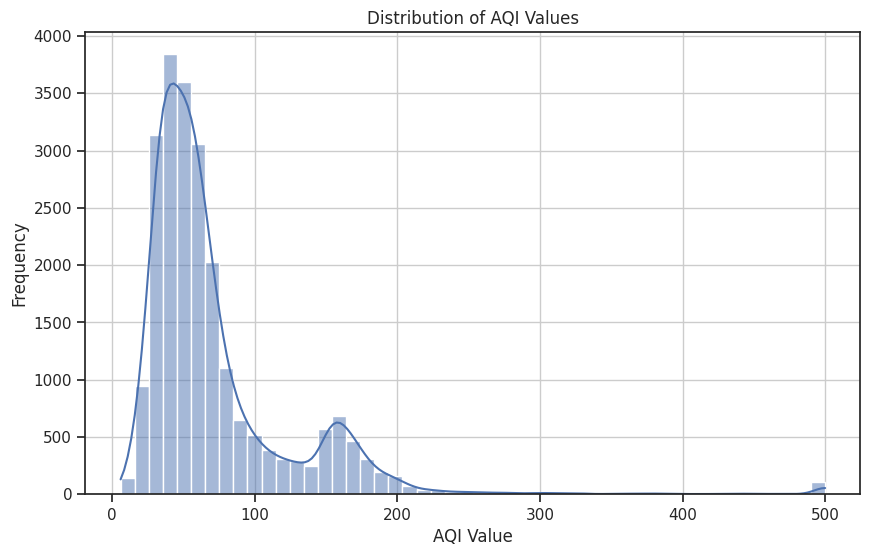

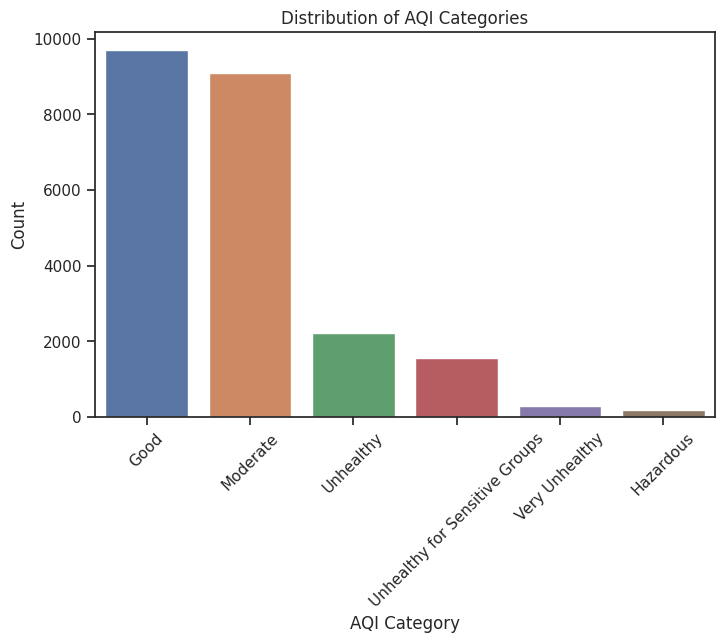

In [ ]:
# Creating a histogram to visualize the distribution of AQI values
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AQI Value', bins=50, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a bar chart to show the distribution of AQI categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AQI Category', order=df['AQI Category'].value_counts().index)
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The Distribution of AQI Values and Categories reveal that majority of the world's AQI Values lie within the range of 0 to 100 and fall under the Good to Moderate AQI Category.

In [85]:
# Calculating the mean AQI values for each country and sort them in descending order
mean_aqi_by_country = df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False)

# Selecting the top 10 countries with the highest mean AQI values
top_10_countries = mean_aqi_by_country.head(10)

# Filtering the dataset to include only data from these top 10 countries
filtered_df = df[df['Country'].isin(top_10_countries.index)]

# Creating a table displaying mean AQI values for the top 10 countries
mean_aqi_table = pd.DataFrame(mean_aqi_by_country.head(10))
mean_aqi_table.reset_index(inplace=True)
mean_aqi_table.columns = ['Country', 'Mean AQI Value']
print(mean_aqi_table)

                Country  Mean AQI Value
0     Republic of Korea      421.000000
1               Bahrain      188.000000
2            Mauritania      179.000000
3              Pakistan      178.788274
4  United Arab Emirates      163.666667
5                 Aruba      163.000000
6                Kuwait      162.000000
7                 Qatar      157.500000
8                 India      152.964228
9               Senegal      152.424242


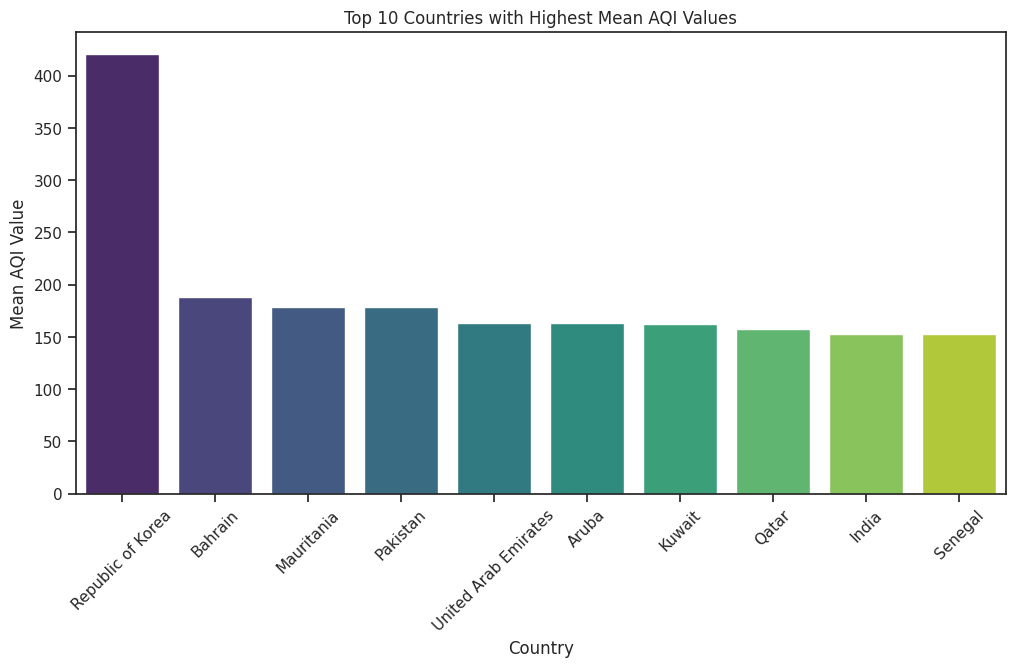

In [89]:
# Creating a bar chart to compare AQI values across the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='Country', y='AQI Value', ci=None, palette='viridis', order=top_10_countries.index)
plt.title('Top 10 Countries with Highest Mean AQI Values')
plt.xlabel('Country')
plt.ylabel('Mean AQI Value')
plt.xticks(rotation=45)
plt.show()

According to the visual above, the most polluted country (overall) is the Republic of Korea with a Mean AQI Value of 421.

In [83]:
# Creating an empty DataFrame to store the most polluted city in each of the top 10 countries
most_polluted_cities = pd.DataFrame(columns=['Country', 'City', 'AQI Value'])

# Iterating through the top 10 countries and find the most polluted city in each
for country in top_10_countries.index:
    country_data = df[df['Country'] == country]
    most_polluted_city = country_data.loc[country_data['AQI Value'].idxmax()][['Country', 'City', 'AQI Value']]
    most_polluted_cities = most_polluted_cities.append(most_polluted_city, ignore_index=True)

# Sorting the DataFrame by AQI Value in descending order
most_polluted_cities.sort_values(by='AQI Value', ascending=False, inplace=True)

print(most_polluted_cities)

                Country          City AQI Value
3              Pakistan  Bahawalnagar       500
8                 India         Rania       500
0     Republic of Korea         Seoul       421
2            Mauritania        Bababe       224
9               Senegal        Dagana       211
1               Bahrain        Manama       188
4  United Arab Emirates     Abu Dhabi       170
6                Kuwait        Kayfan       164
7                 Qatar          Doha       164
5                 Aruba    Oranjestad       163


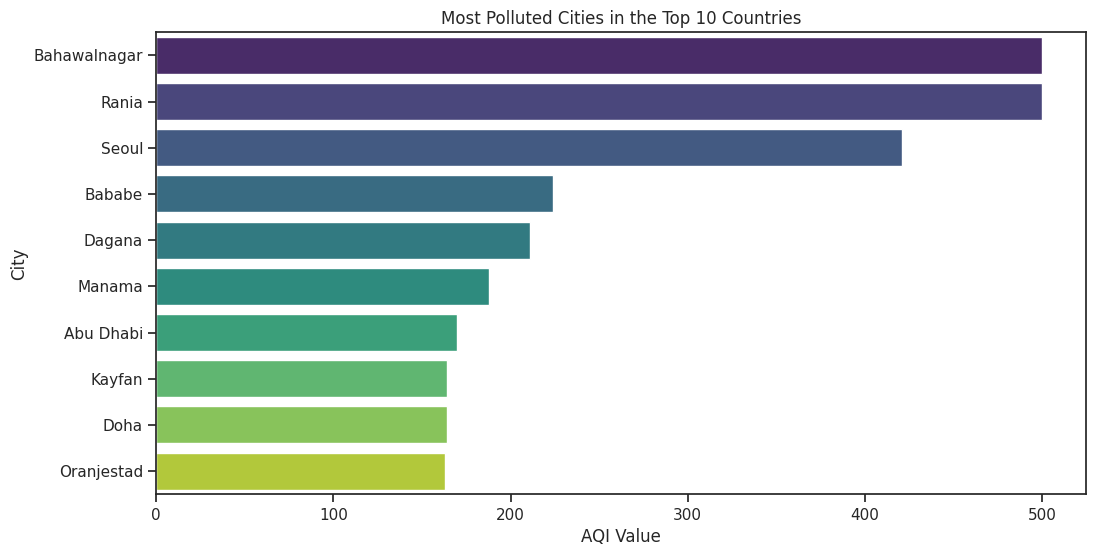

In [84]:
# Creating a bar chart to compare AQI values of the most polluted cities
plt.figure(figsize=(12, 6))
sns.barplot(data=most_polluted_cities, x='AQI Value', y='City', palette='viridis')
plt.title('Most Polluted Cities in the Top 10 Countries')
plt.xlabel('AQI Value')
plt.ylabel('City')
plt.show()

In [88]:
# Sorting the DataFrame by AQI Value in descending order to find the most polluted cities
top_10_polluted_cities = df.sort_values(by='AQI Value', ascending=False).head(10)

# Creating a table of the top 10 most polluted cities with 'Country,' 'City,' and 'AQI Value' columns
top_10_polluted_cities_table = top_10_polluted_cities[['Country', 'City', 'AQI Value']]

print("Top 10 Most Polluted Cities:")
print(top_10_polluted_cities_table)

Top 10 Most Polluted Cities:
                  Country        City  AQI Value
9107                India  Faridnagar        500
8101                India     Gopamau        500
12721               India   Jalalabad        500
17141               India   Pilibanga        500
6990                India         Nuh        500
12354               India       Hansi        500
2858                India      Bareli        500
20567               India       Sasni        500
22259  Russian Federation       Tynda        500
21639               India  Jhunjhunun        500


Out of the top 10 most polluted cities, 9 are located in India, and all of them have a consistent AQI value of 500.

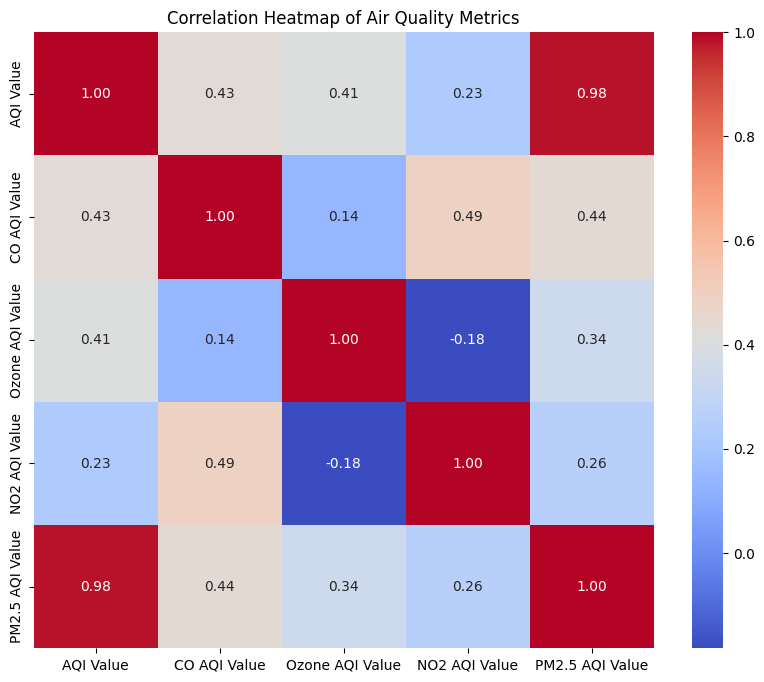

In [ ]:
# Selecting relevant columns for correlation analysis
corr_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Calculating the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Air Quality Metrics')
plt.show()

The above Correlation Heatmap of Air Quality Metrics reveals a **strong positive correlation** of **0.98** between AQI Value and PM2.5 AQI Value which suggests a highly significant relationship. This indicates that as the concentration of fine particulate matter (PM2.5) in the air increases, the overall Air Quality Index (AQI) value tends to increase as well. Therefore, a higher PM2.5 AQI Value is indicative of worse air quality.

In addition, since 0.98 is the highest correlation coefficient compared to 0.43, 0.41, and 0.23, which are the correlation metrics of AQI Value with CO AQI Value, Ozone AQI Value, and NO2 AQI Value, respectively, we can conclude that PM2.5 has the strongest impact on AQI Value.

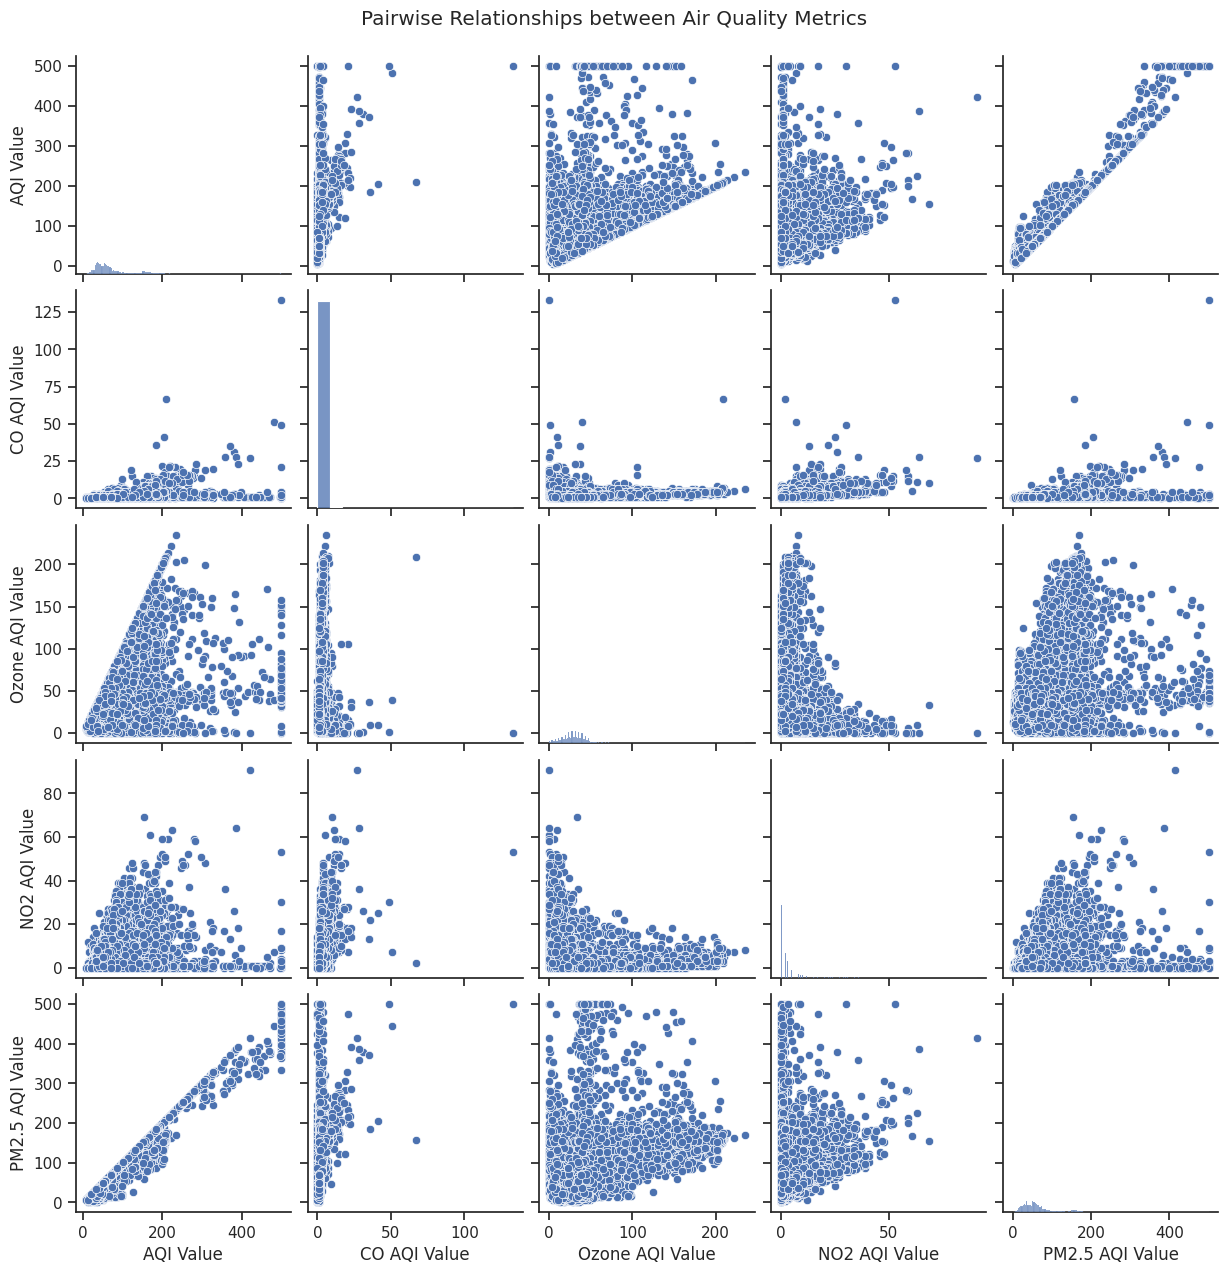

In [ ]:
# Creating a pairplot to visualize pairwise relationships between air quality metrics
sns.set(style="ticks")
pairplot_df = df[corr_columns]
sns.pairplot(pairplot_df, kind="scatter")
plt.suptitle('Pairwise Relationships between Air Quality Metrics', y=1.02)
plt.show()

Similarly, the scatterplot also reveals a **strong positive linear relationship** between 'AQI Value' and 'PM2.5 AQI Value.' As PM2.5 AQI Value increases, AQI Value also tends to increase, indicating that fine particulate matter (PM2.5) has a substantial impact on the overall air quality index (AQI). It confirms the observations made from the correlation heatmap, reinforcing the idea that PM2.5 has the most substantial impact on AQI Value, followed by CO, ozone, and NO2 to varying degrees.

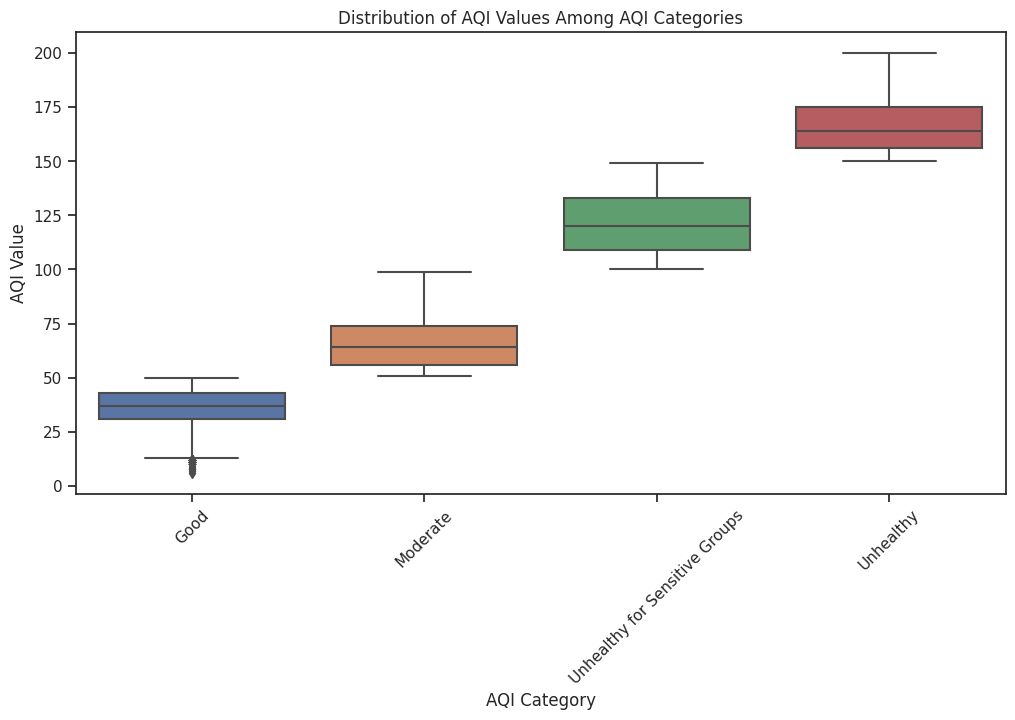

In [104]:
# Creating a box plot to visualize the distribution of AQI values within each AQI category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AQI Category', y='AQI Value', order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy'])
plt.title('Distribution of AQI Values Among AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.show()

The boxplots above illustrate the varying distributions of AQI values across different AQI categories. It reveals that air quality tends to be relatively stable and within a certain range in the "Good", "Moderate" and "Unhealthy" categories, but becomes a little more variable in the "Unhealthy for Sensitive Groups"  category. Outliers at the lower half of the 'Good' category suggest that there are cities where air quality is exceptionally better than others.


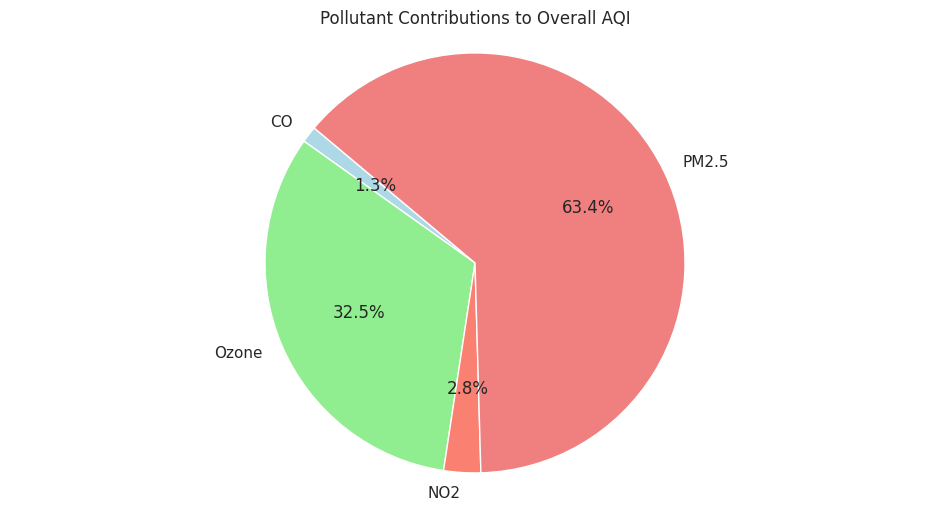

In [120]:
# Calculating the mean values of pollutant concentrations for each pollutant
mean_CO = df['CO AQI Value'].mean()
mean_Ozone = df['Ozone AQI Value'].mean()
mean_NO2 = df['NO2 AQI Value'].mean()
mean_PM25 = df['PM2.5 AQI Value'].mean()

# Calculating the mean values as a percentage of the overall AQI
total_mean_AQI = (mean_CO + mean_Ozone + mean_NO2 + mean_PM25) / 4.0

percentage_CO = (mean_CO / total_mean_AQI) * 100
percentage_Ozone = (mean_Ozone / total_mean_AQI) * 100
percentage_NO2 = (mean_NO2 / total_mean_AQI) * 100
percentage_PM25 = (mean_PM25 / total_mean_AQI) * 100

# Creating separate pie charts to show pollutant contributions
labels = ['CO', 'Ozone', 'NO2', 'PM2.5']
sizes = [percentage_CO, percentage_Ozone, percentage_NO2, percentage_PM25]
colors = ['lightblue', 'lightgreen', 'salmon', 'lightcoral']

# Creating a pie chart for pollutant contributions
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pollutant Contributions to Overall AQI')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The pie chart illustrates the contributions of various pollutants to the overall Air Quality Index (AQI). From the chart, it is evident that PM2.5 has the most substantial contribution, accounting for 63.4% of the overall AQI. Ozone follows as the second most influential pollutant, contributing 32.5% to the AQI. Nitrogen dioxide (NO2) and carbon monoxide (CO) have relatively smaller contributions, contributing 2.8% and 1.3%, respectively.

## **Conclusion**

In conclusion, this exploratory data analysis (EDA) project on global air pollution revealed several key insights:

* The majority of cities worldwide have AQI values falling within the "Good" to "Moderate" categories.
* The Republic of Korea was identified as the most polluted country overall, with a mean AQI value of 421.
* India dominates the list of the top 10 most polluted cities, all with a consistent AQI value of 500.
* PM2.5 has the strongest impact on the overall AQI value, followed by ozone, CO, and NO2.
* The pie chart showed that PM2.5 contributes the most to the overall AQI, followed by ozone, with NO2 and CO having smaller contributions.

Overall, this analysis sheds light on the state of air quality in various countries and cities around the world. It underscores the importance of addressing air pollution, particularly the impact of fine particulate matter (PM2.5) on air quality. These insights can inform policy decisions and actions to improve air quality and public health in regions facing air pollution challenges.

It's important to note that this analysis is based on the provided dataset, and further research may be necessary for a more comprehensive understanding of global air pollution and its implications.